In [22]:
import gc, argparse, sys, os, errno
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from beakerx import *
plt.style.use('ggplot')
import seaborn as sns
sns.set()
import h5py
import os
from tqdm import tqdm_notebook as tqdm
import scipy
import sklearn
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')
from scipy.io import loadmat
from matplotlib.mlab import griddata
tableau20 = np.array([(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)])/255.
styles = ["white","dark",'whitegrid',"darkgrid"]
contexts = ['paper','talk','poster','notebook']
from ipywidgets import interact, FloatSlider,IntSlider, RadioButtons,Dropdown,Tab,Text,SelectMultiple,FloatRangeSlider
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from mpl_toolkits.mplot3d.axes3d import *
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from pypcd import pypcd

Populating the interactive namespace from numpy and matplotlib


In [3]:
cd /home/xupeng/projects/signal

/home/xupeng/projects/signal


In [21]:
ls data/sim_structured/

map.bt*                 sim_structured_2.pcd*  sim_structured_7.pcd*
sim_structured_10.pcd*  sim_structured_3.pcd*  sim_structured_8.pcd*
sim_structured_11.pcd*  sim_structured_4.pcd*  sim_structured_9.pcd*
sim_structured_12.pcd*  sim_structured_5.pcd*  sim_structured.bag*
sim_structured_1.pcd*   sim_structured_6.pcd*  sim_structured_octomap.csv


In [23]:
pc= {}
for i in np.arange(1,13):
    pc[i] = pypcd.PointCloud.from_path('data/sim_structured/sim_structured_'+str(i)+'.pcd')
# pc.pc_data has the data as a structured array
# pc.fields, pc.count, etc have the metadata

In [24]:
pc[1].pc_data

array([(1.4697466, 1.5538477 , 0.117843  ,  0.00202733),
       (1.484061 , 1.550883  , 0.10141632,  0.01049844),
       (1.4925566, 1.5199413 , 0.09957764,  0.01271292), ...,
       (1.7421502, 0.06909835, 1.0964355 , -0.00315656),
       (1.6824987, 0.09885365, 1.0897381 , -0.00290228),
       (1.6681153, 0.1013394 , 1.0640466 , -0.00043041)],
      dtype=[('x', '<f4'), ('y', '<f4'), ('z', '<f4'), ('intensity', '<f4')])

In [10]:
pc.pc_data.shape,pc.fields, pc.count

((3500,), ['x', 'y', 'z', 'intensity'], [1, 1, 1, 1])

In [15]:
pc.pc_data['x']

array([1.4697466, 1.484061 , 1.4925566, ..., 1.7421502, 1.6824987,
       1.6681153], dtype=float32)

In [16]:
pc.pc_data['y']

array([1.5538477 , 1.550883  , 1.5199413 , ..., 0.06909835, 0.09885365,
       0.1013394 ], dtype=float32)

In [25]:
def plot_3d_grid_surface(pc_ind,width,height,azim,elev,contextind,styind,option):
    sns.set_context(contexts[int(contextind)])
    sns.set_style(styles[int(styind)])
    fig = plt.figure(figsize=(width,height))
    X = pc[pc_ind].pc_data['x']
    Y = pc[pc_ind].pc_data['y']
    Z = pc[pc_ind].pc_data['z']
    x = X.ravel()
    y = Y.ravel()
    z = Z.ravel()
    xi = np.linspace(min(x), max(x))
    yi = np.linspace(min(y), max(y))
    X, Y = np.meshgrid(xi, yi)
    # interpolation
    Z = griddata(x, y, z, xi, yi,interp='linear')
    ax = Axes3D(fig)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.scatter3D(x,y,z,c=z,cmap=plt.cm.jet)
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.binary_r,linewidth=1, antialiased=True,alpha=0.2) 
    ax.view_init(azim=azim,elev=elev)  # 50 20
    ax.set_title('3D surface')
    fig.tight_layout()
    plt.gca().invert_yaxis()
    if option=='save':
        fig.savefig('3D surface.png')
    else:
        plt.show()
interact(plot_3d_grid_surface,
    contextind=FloatSlider(min=0,max=3,step=1,value=2),
         styind=FloatSlider(min=0,max=2,step=1),
         pc_ind=IntSlider(min=1,max=12,step=1,value=1),
    width =FloatSlider(min=4,max=40,step=1,value=25),
    height= FloatSlider(min=4,max=30,step=1,value=16),
    azim= FloatSlider(min=0,max=180,step=2,value=45),
         option= RadioButtons(options=['show','save']),
    elev= FloatSlider(min=0,max=180,step=1,value=32))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0xLCBkZXNjcmlwdGlvbj11J3BjX2luZCcsIG1heD0xMiwgbWluPTEpLCBGbG9hdFNsaWRlcih2YWx1ZT0yNS4wLCBkZXNjcmnigKY=


<function __main__.plot_3d_grid_surface>

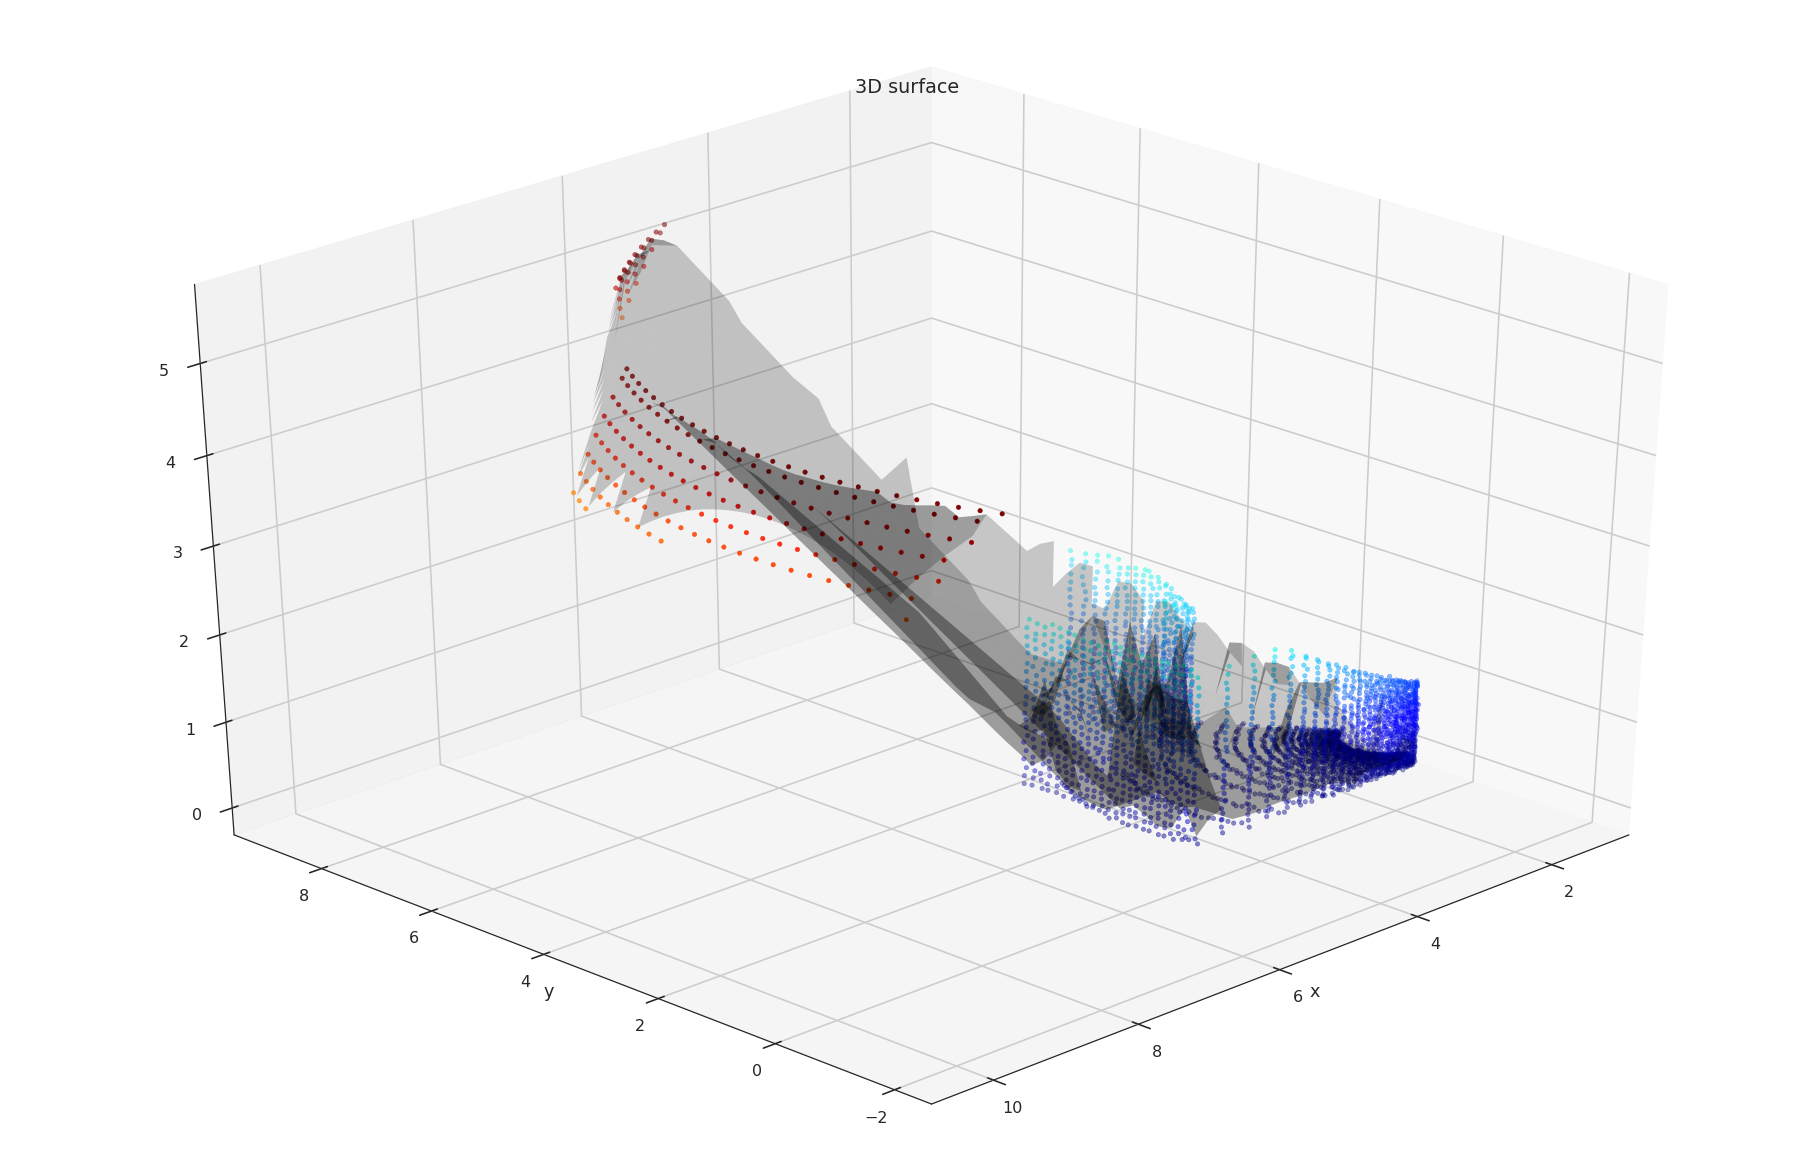

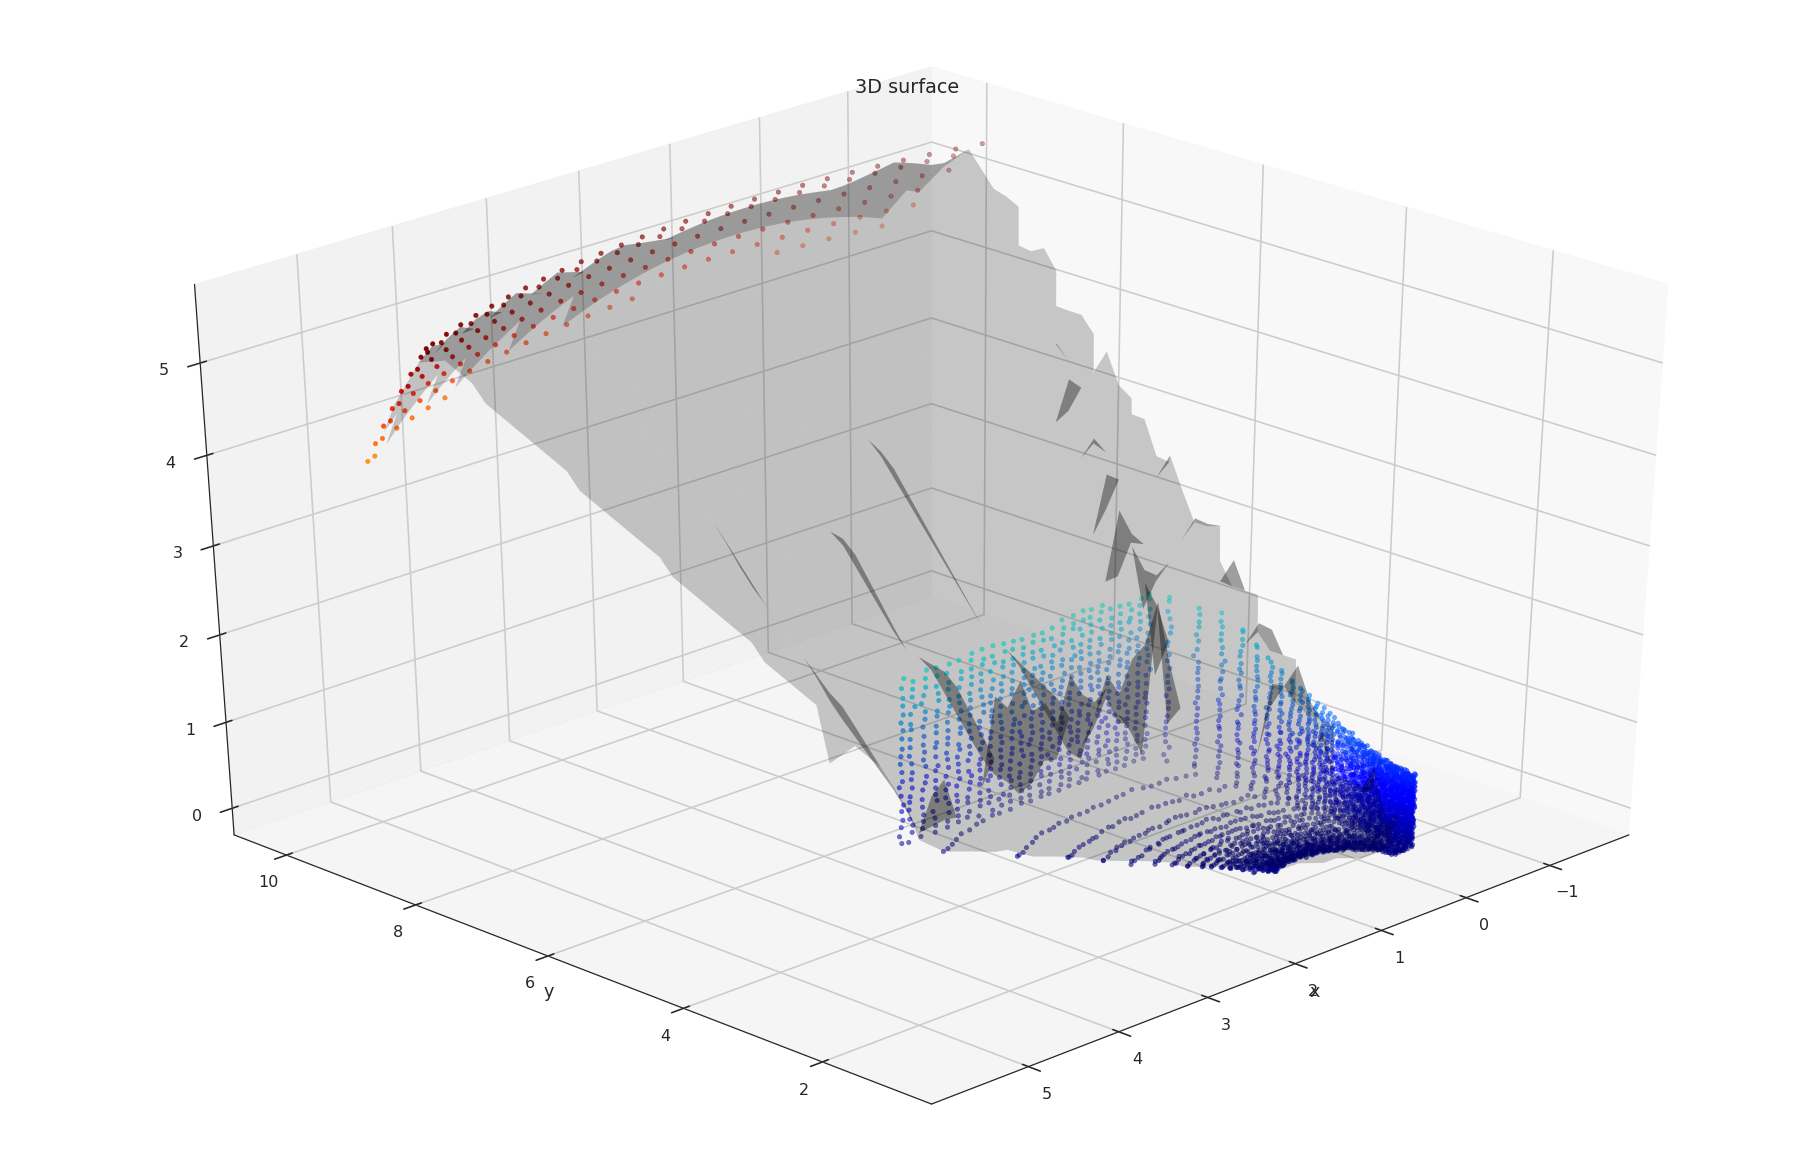

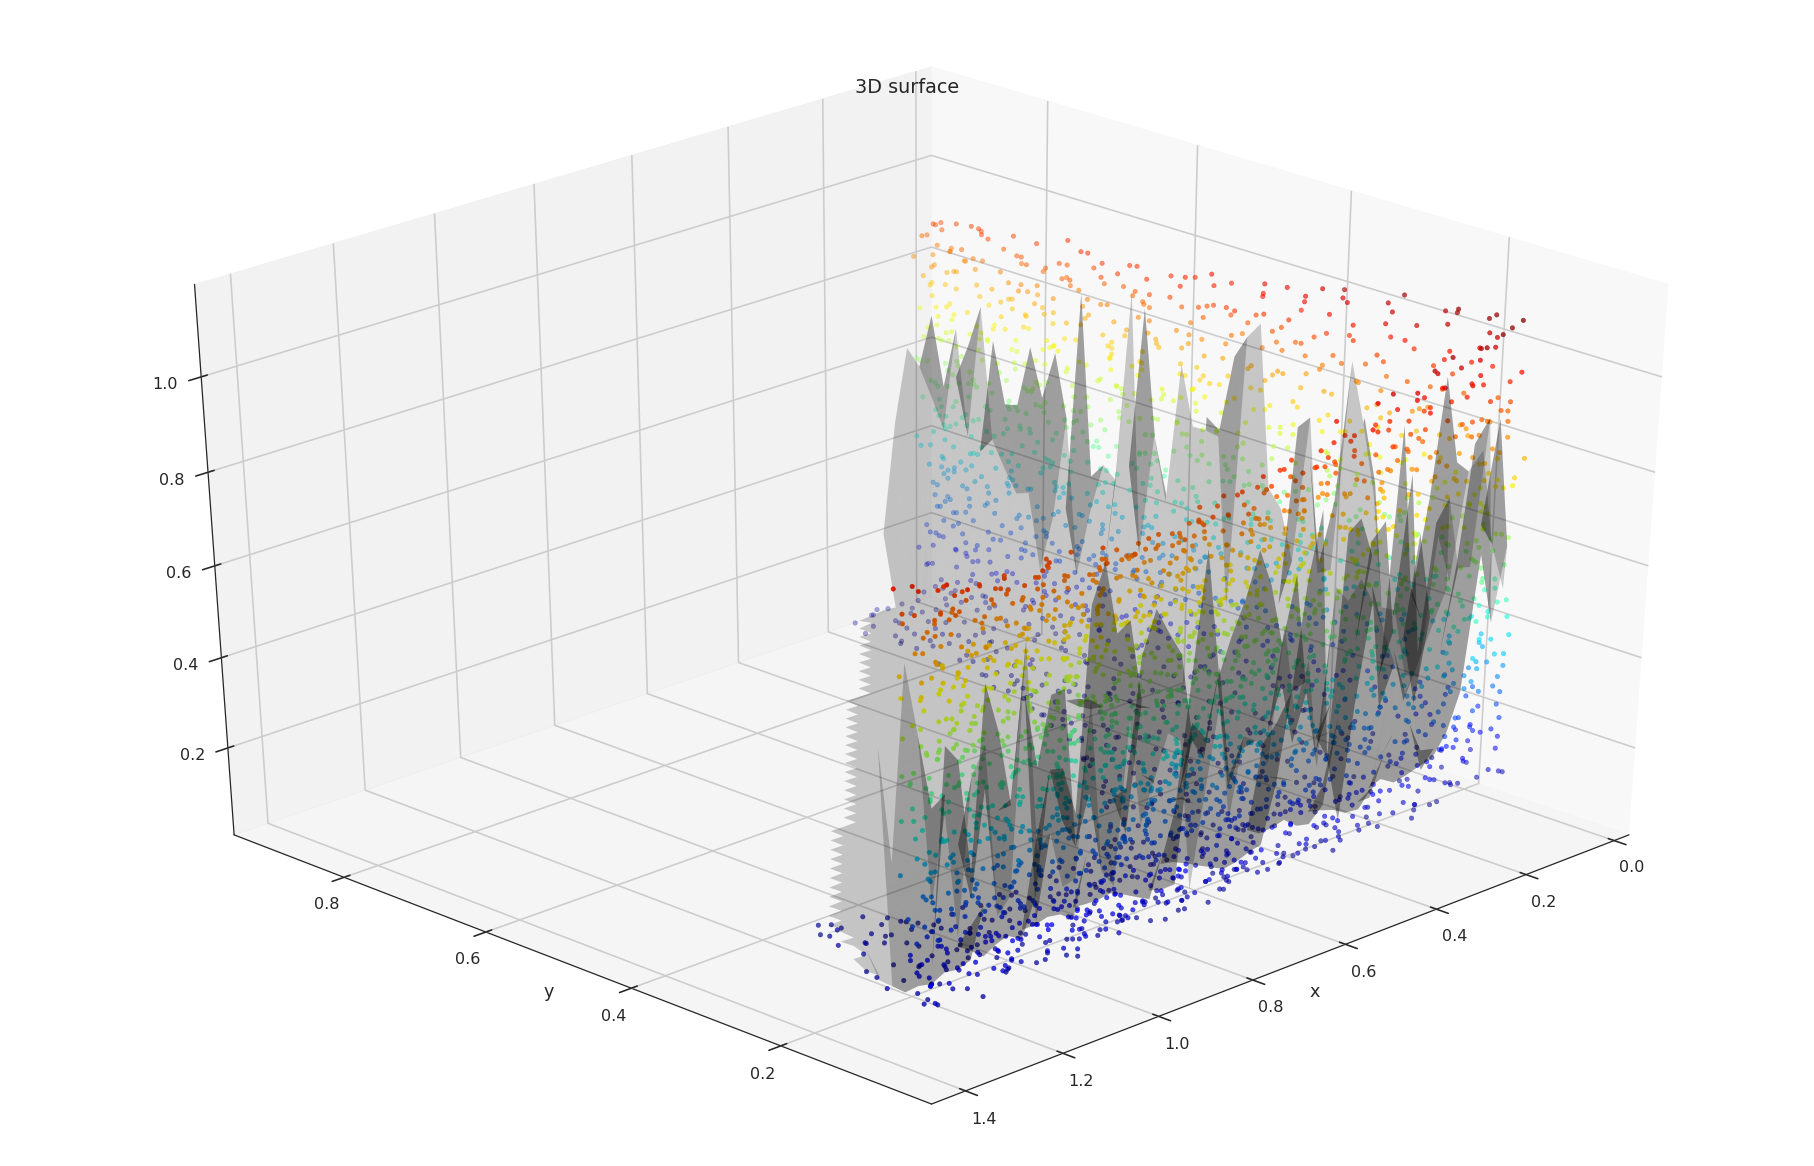

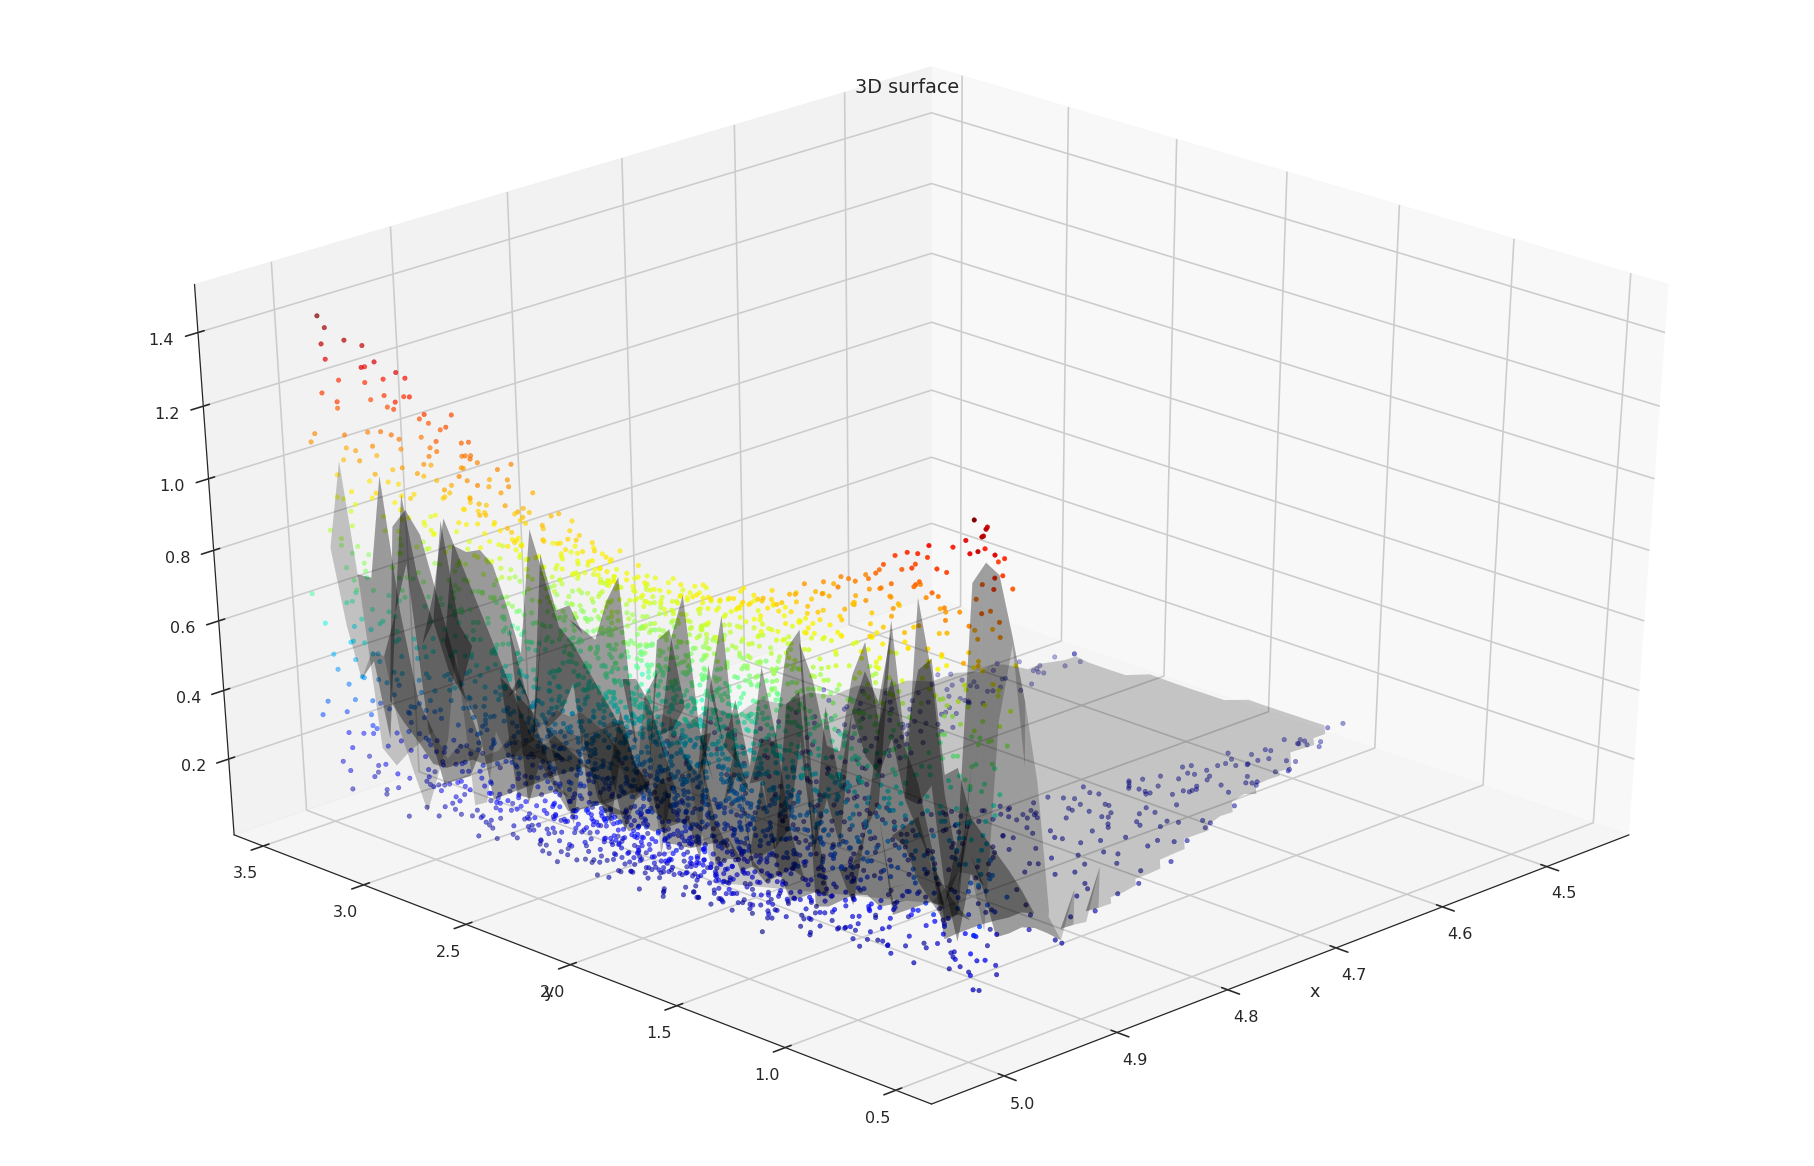

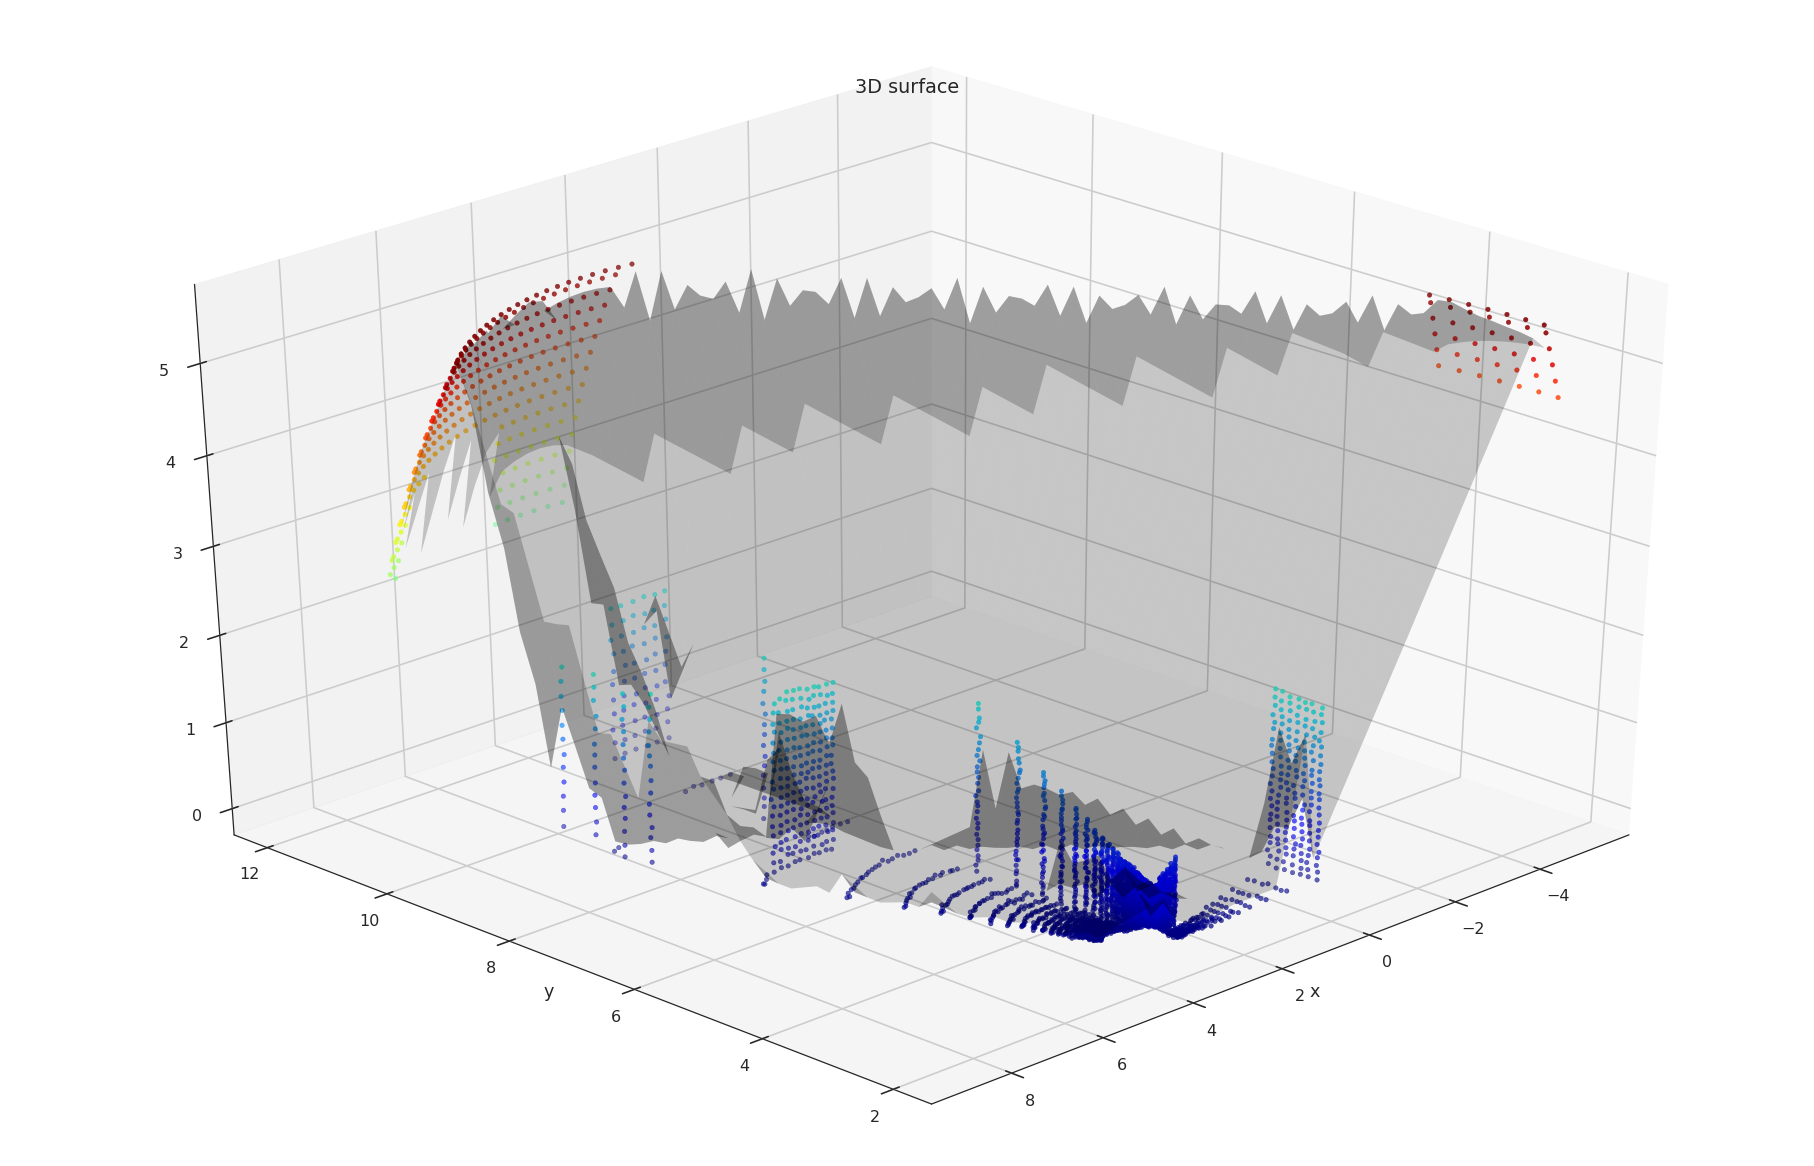

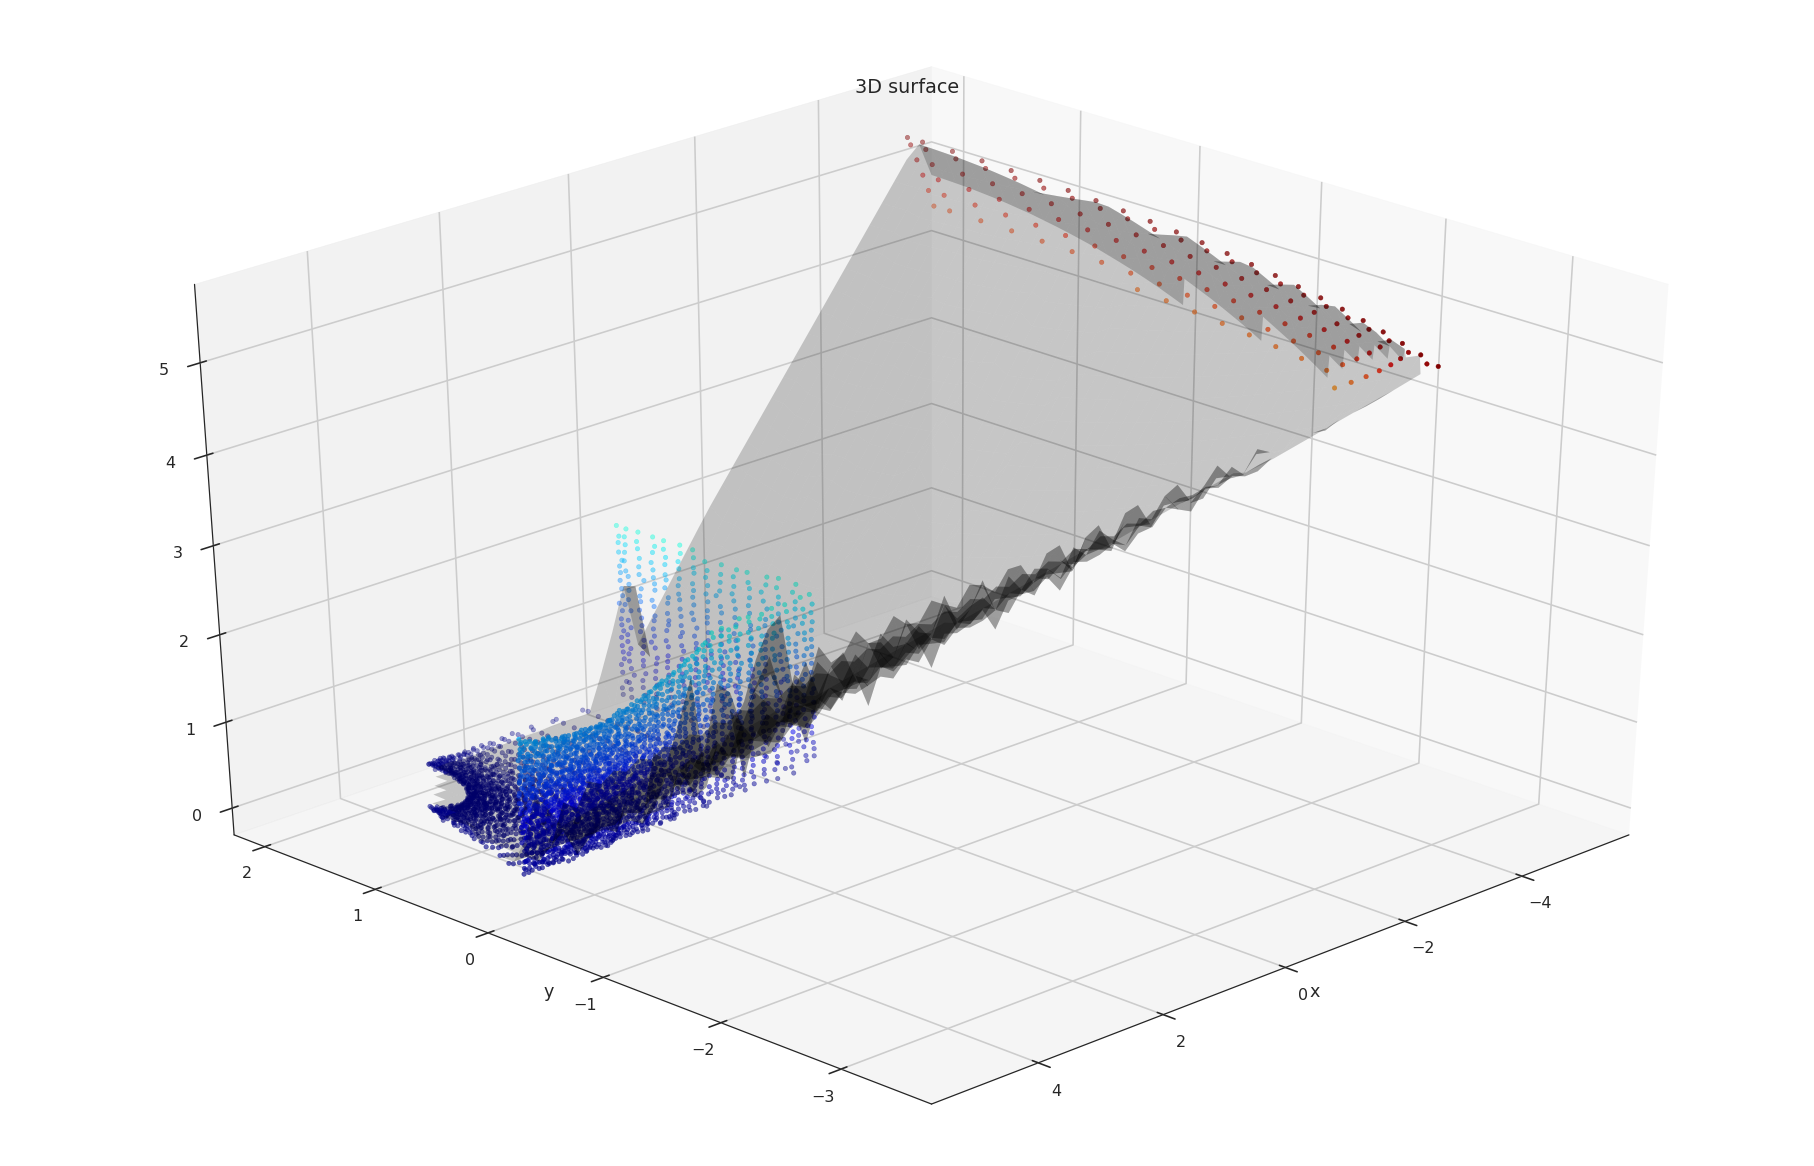

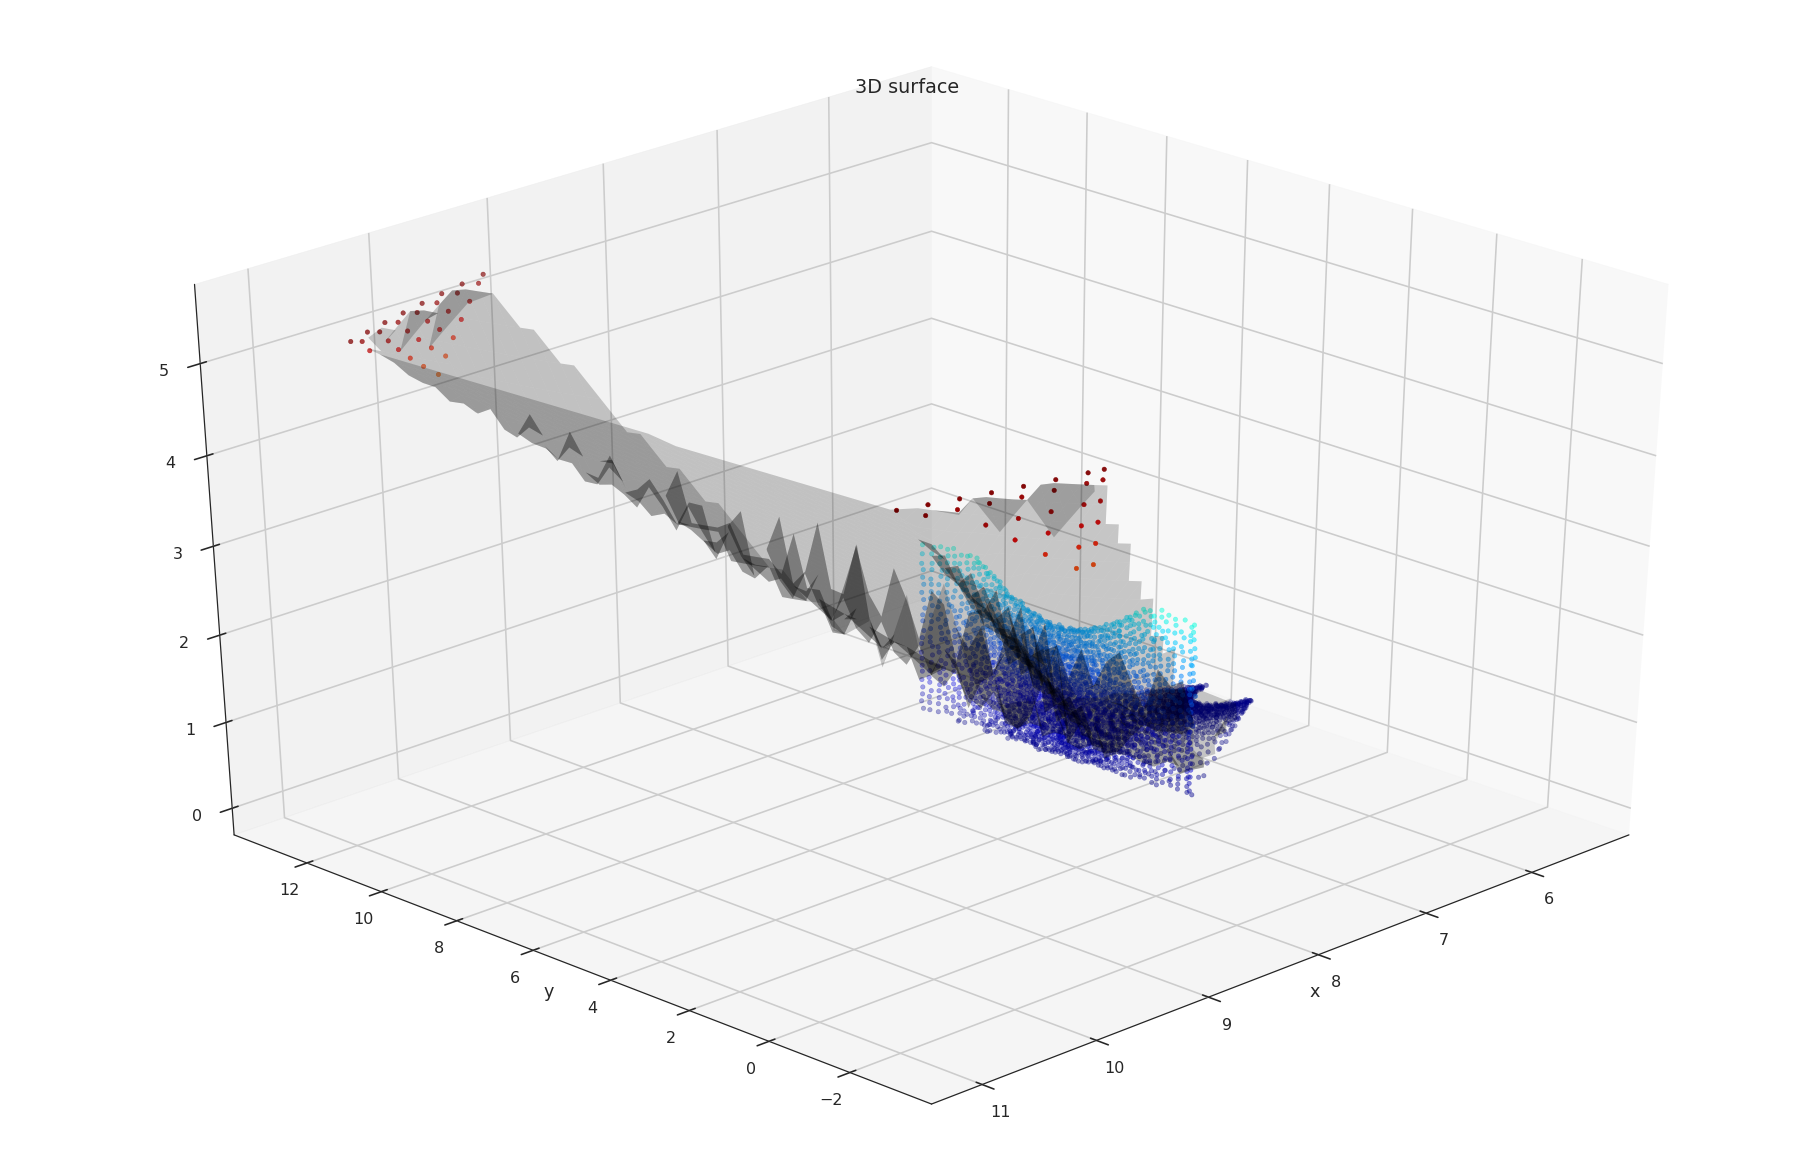

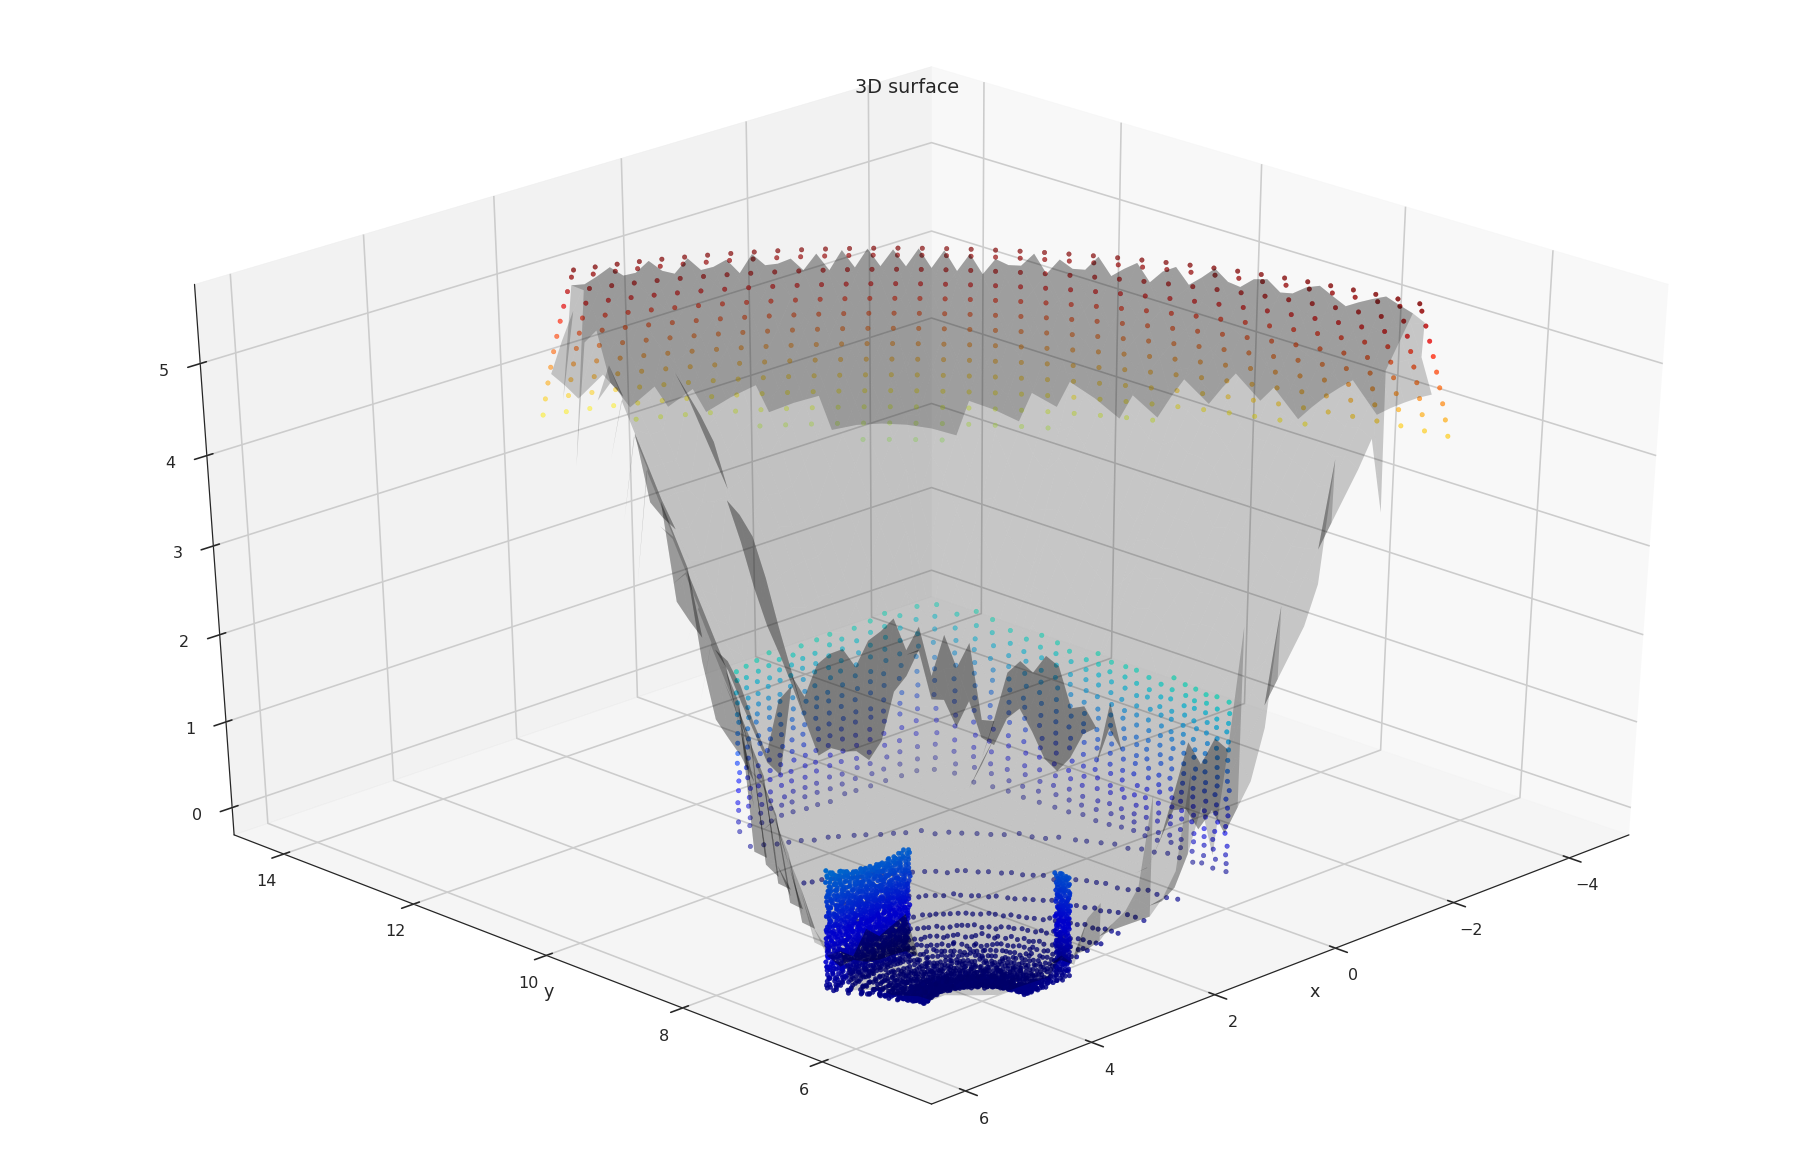

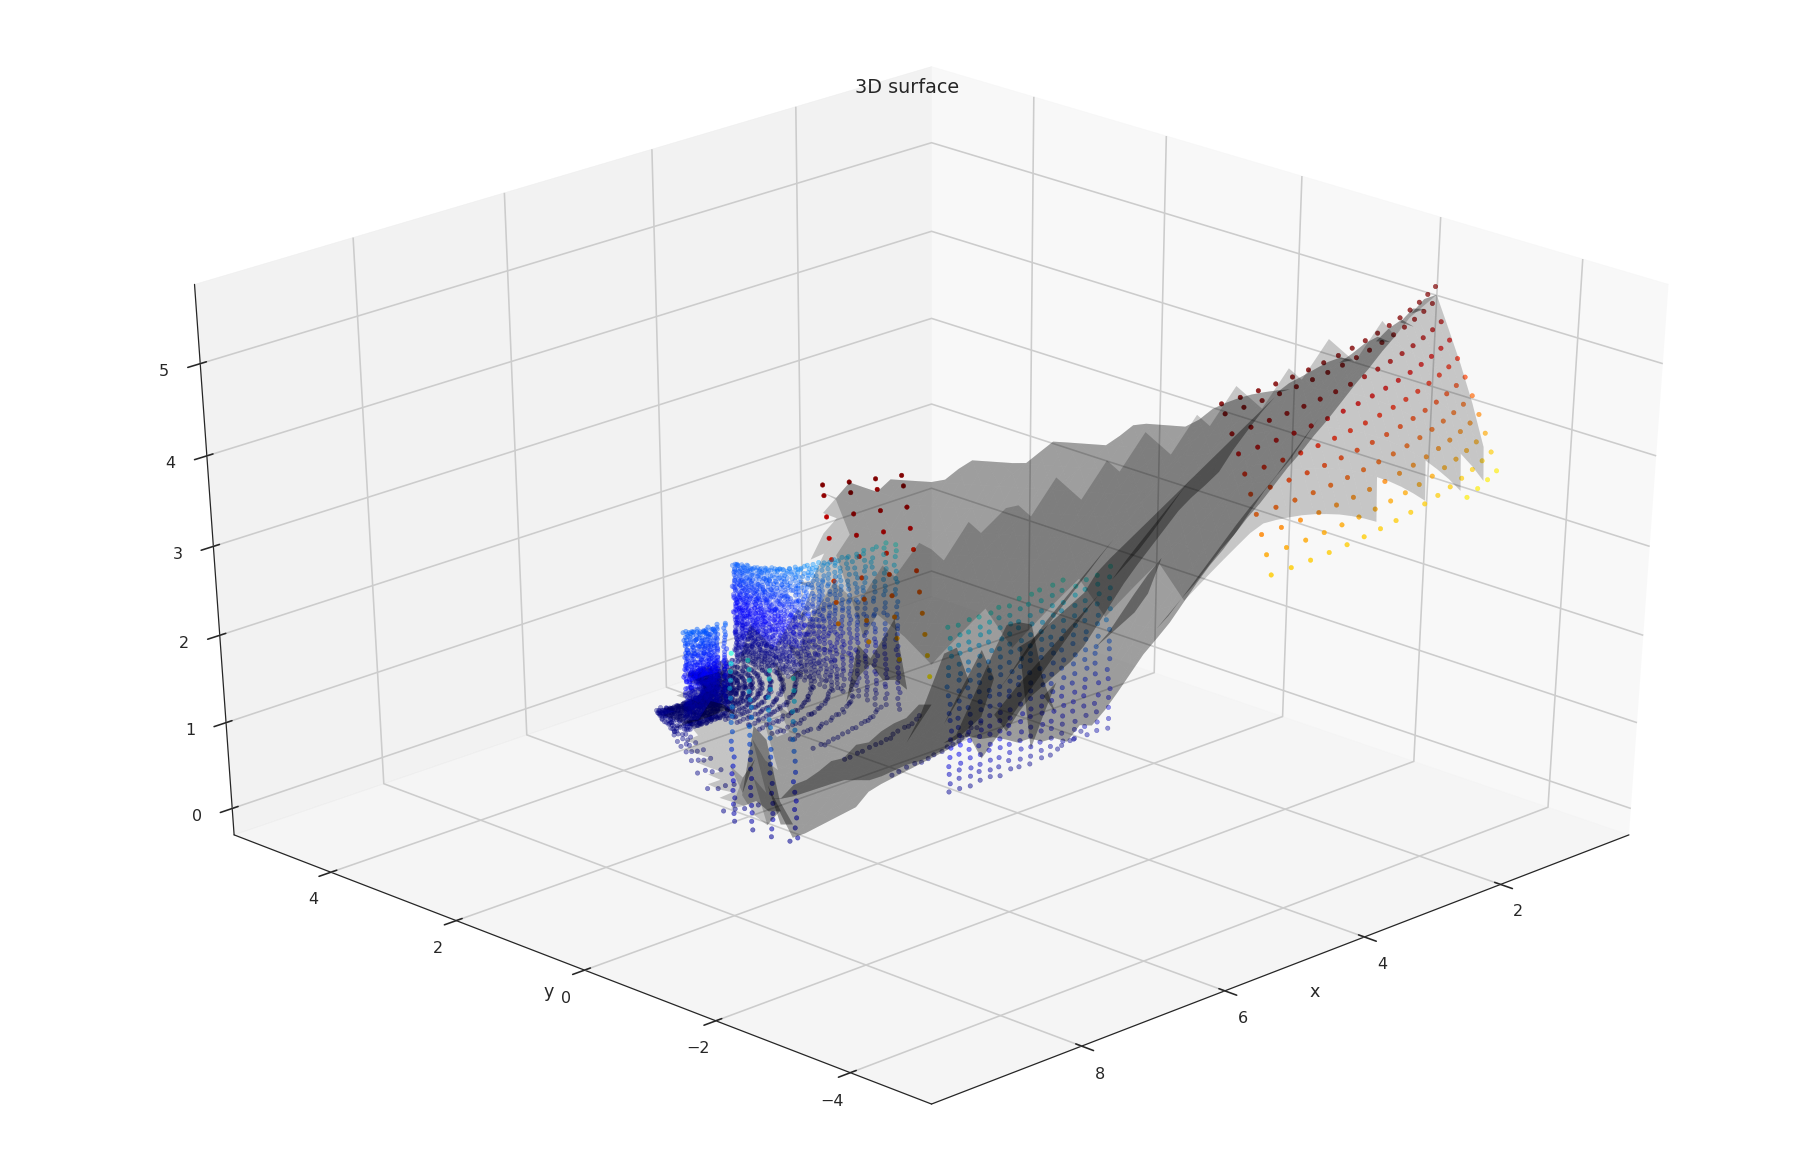

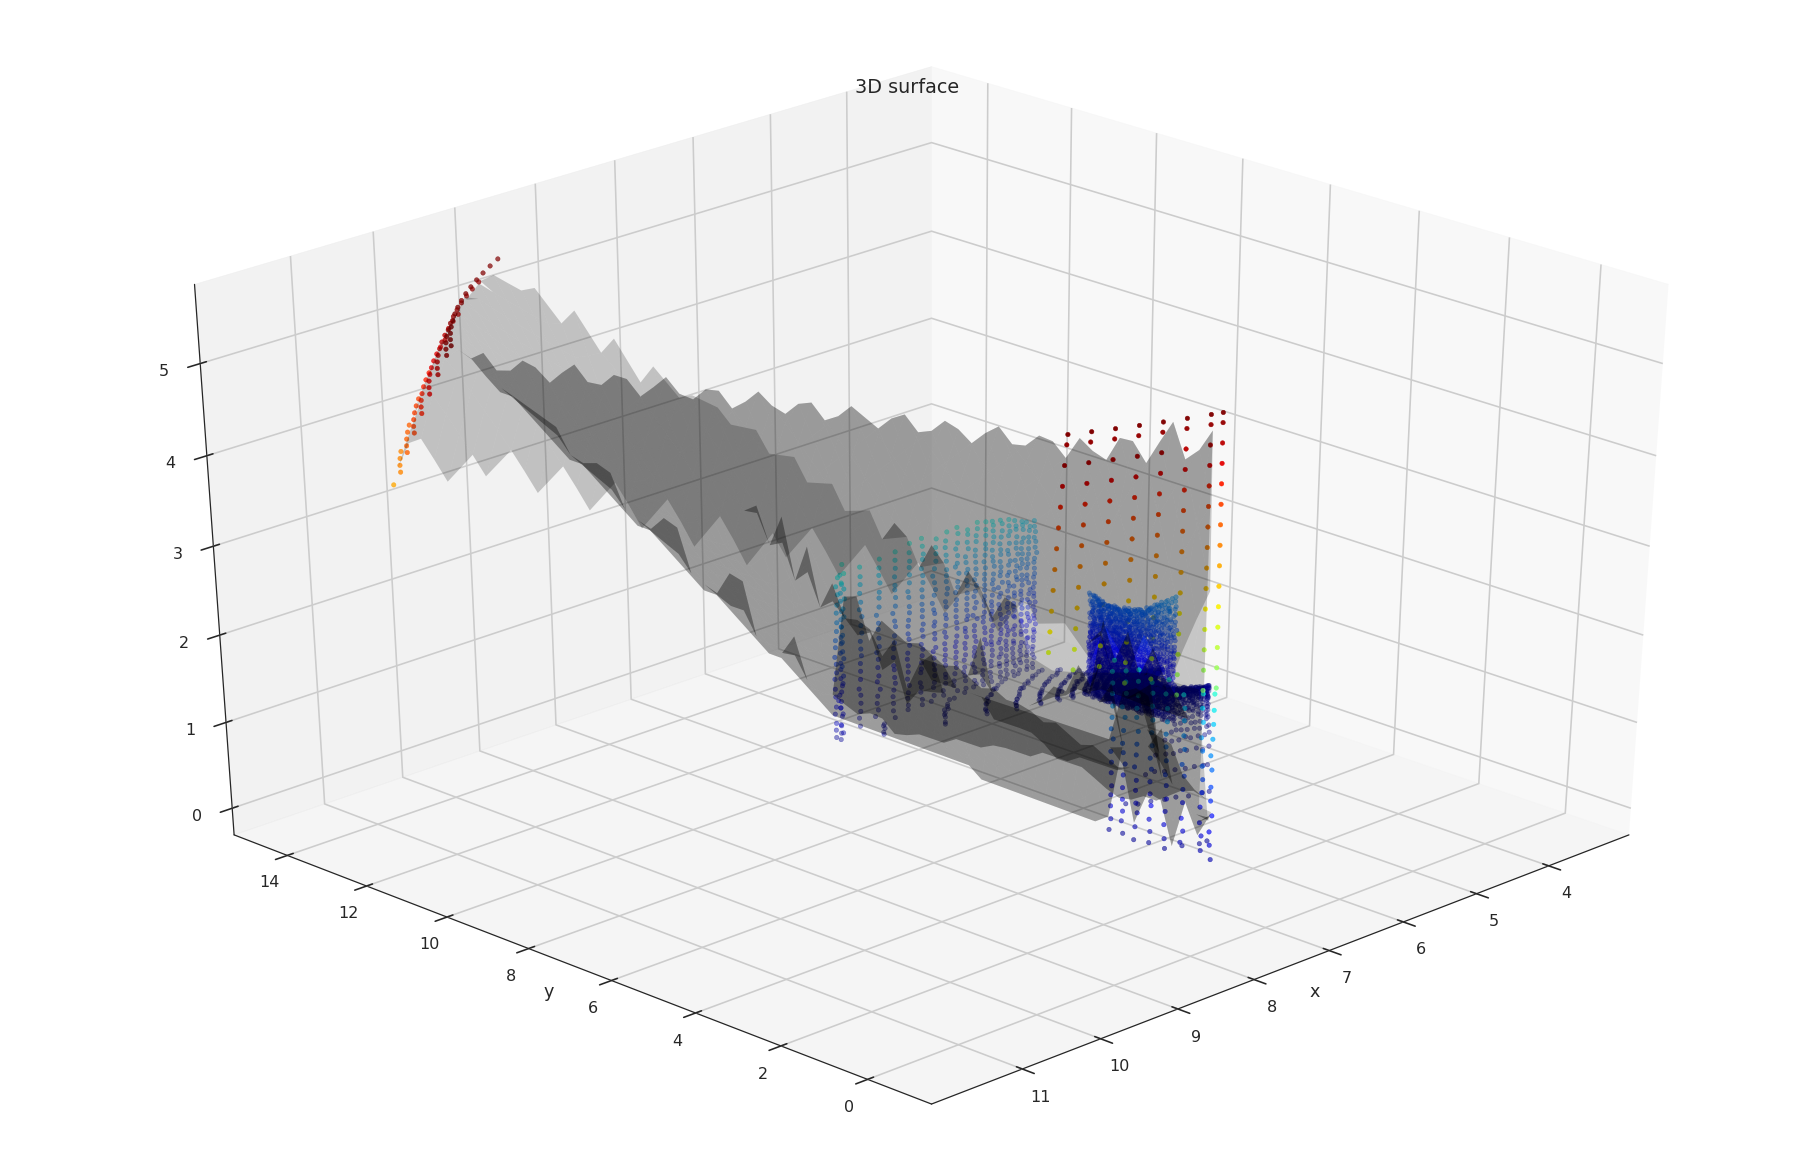

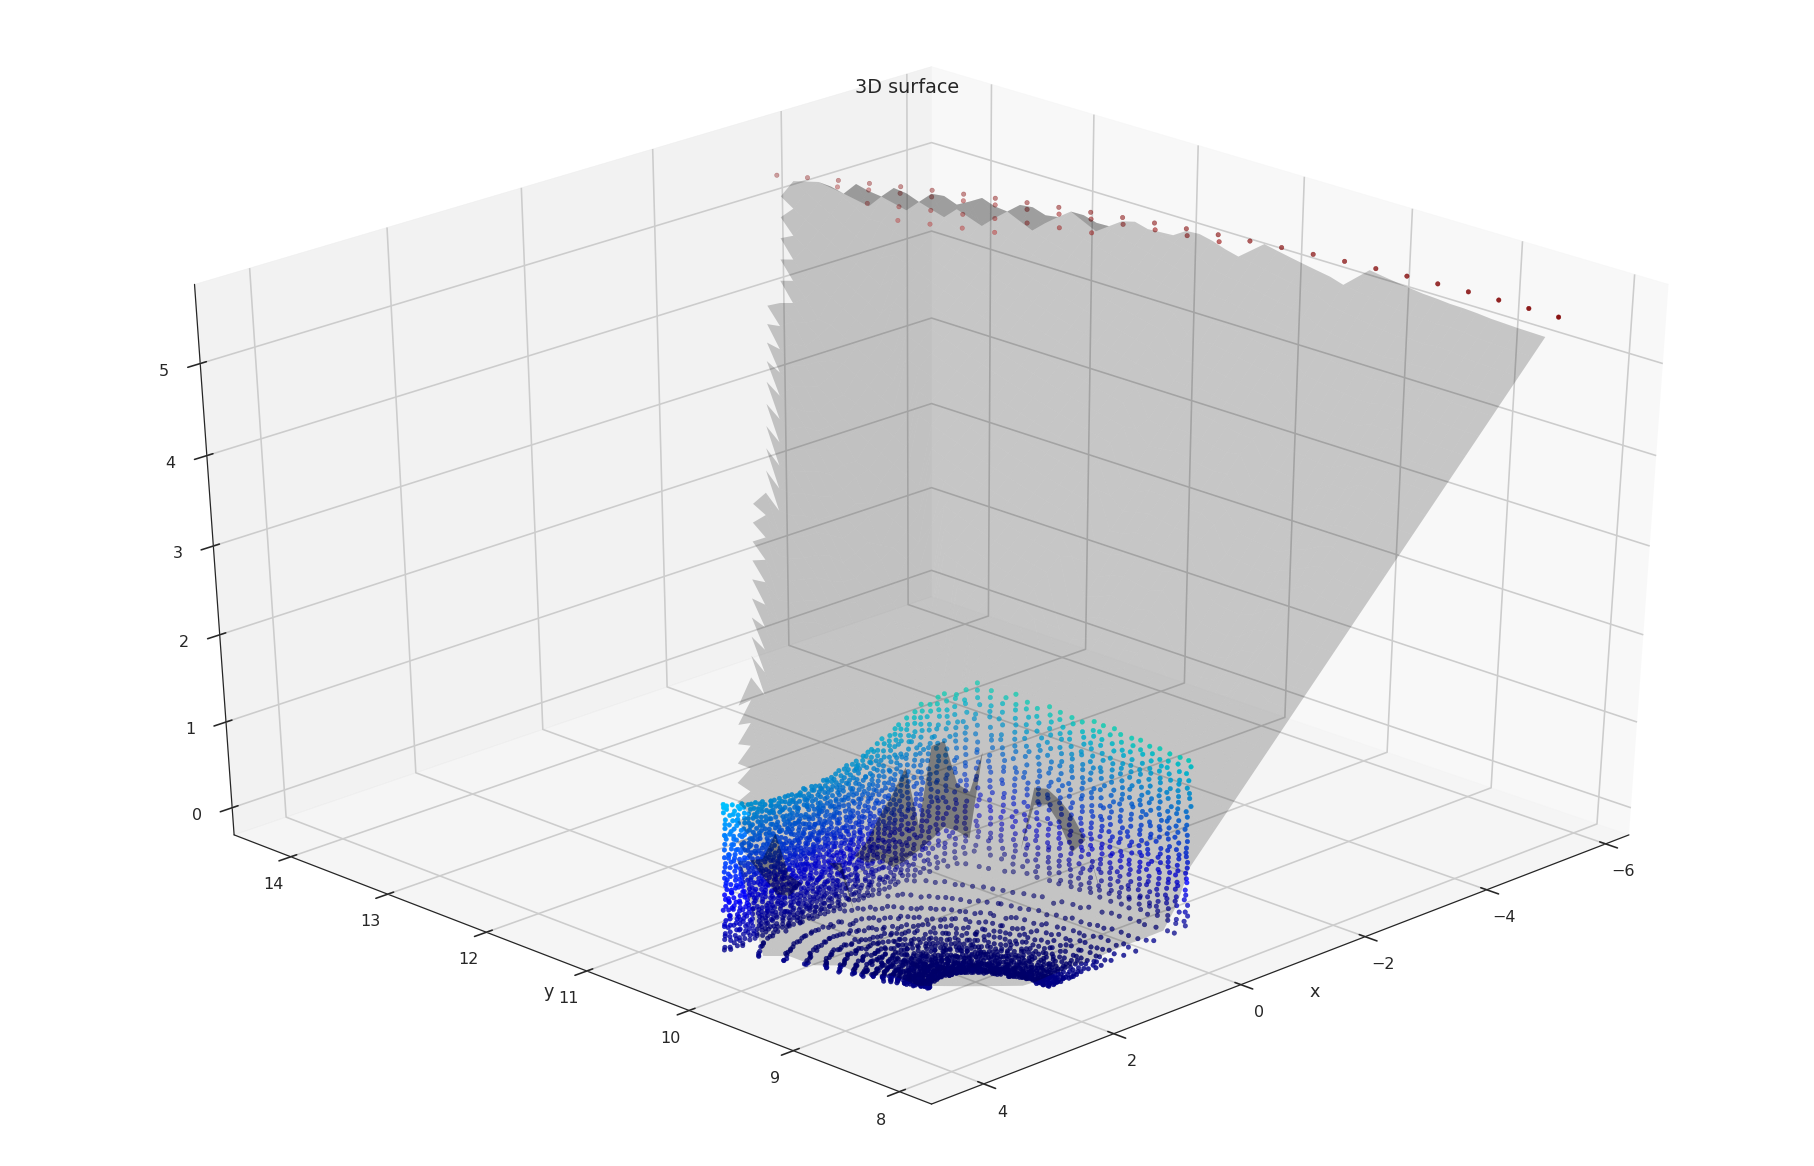

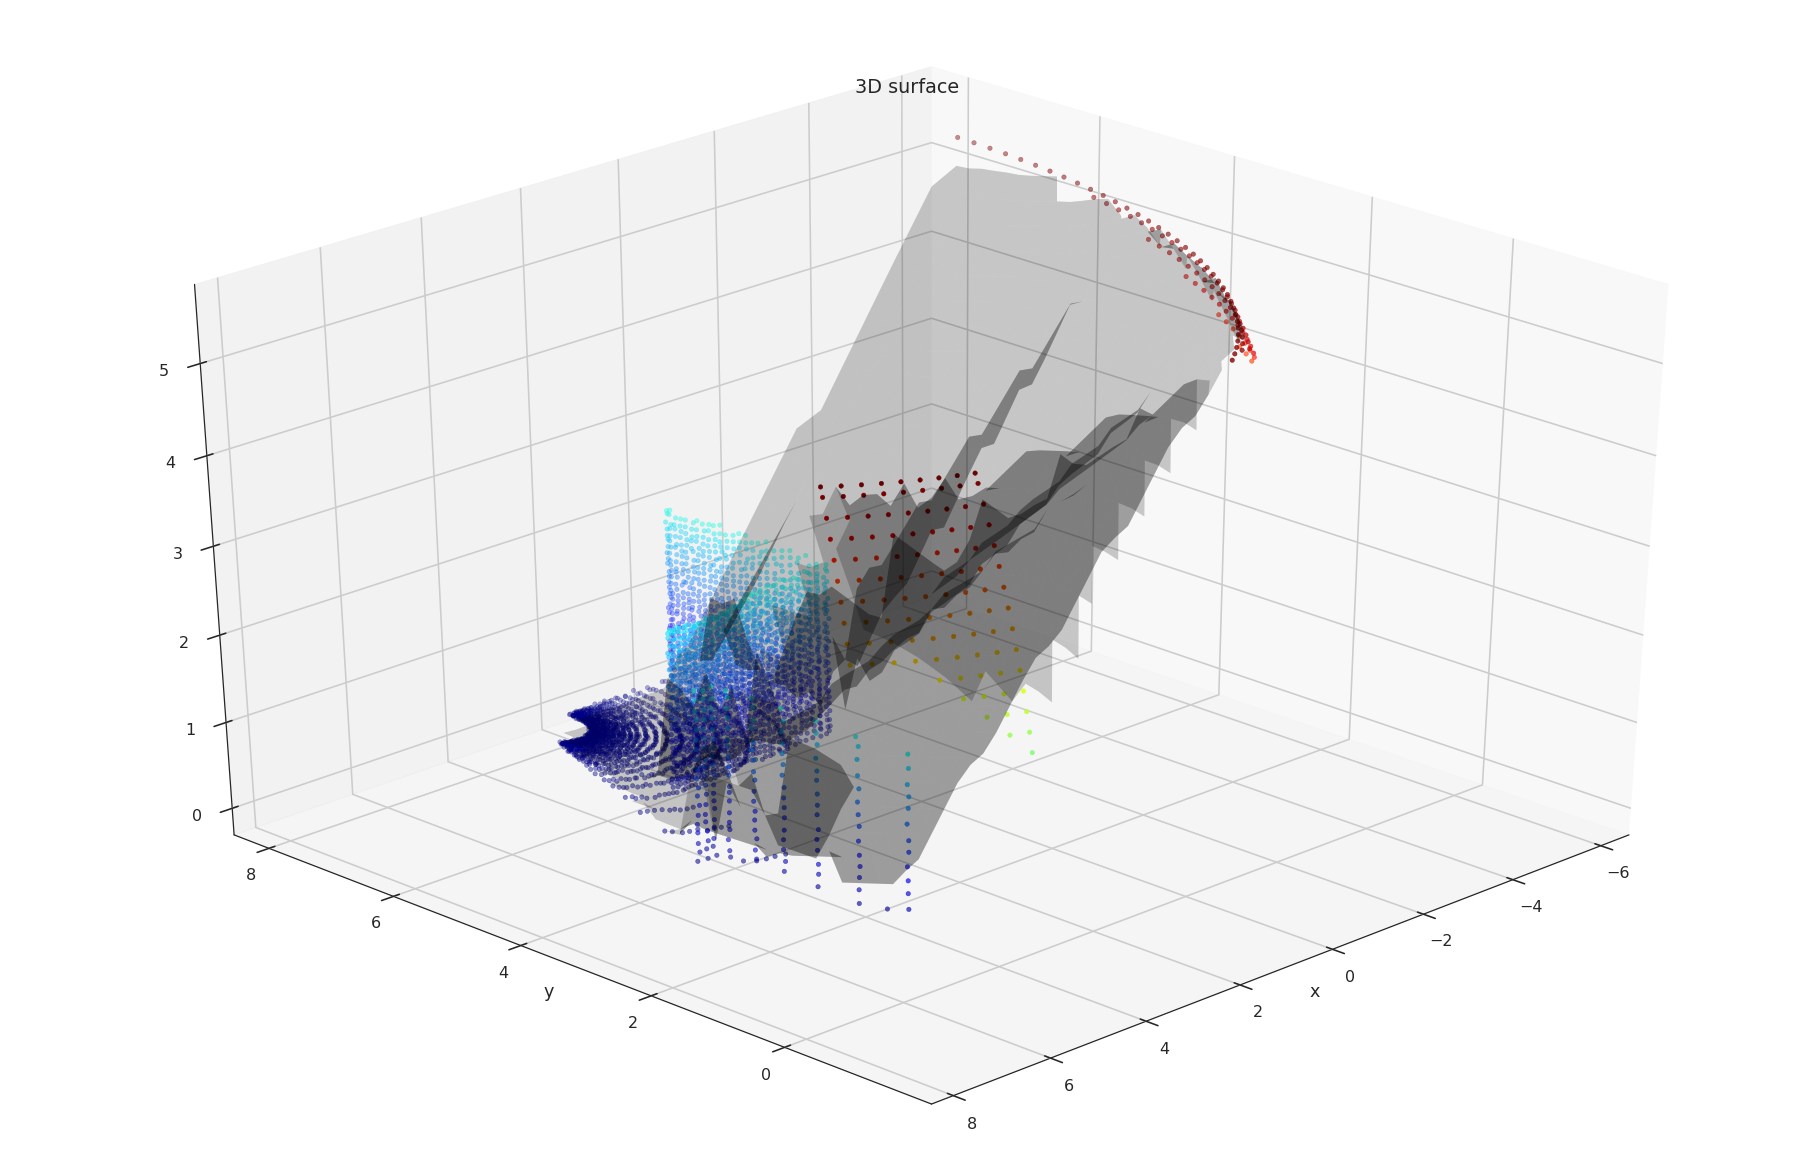

In [27]:
for i in np.arange(1,13):
    plot_3d_grid_surface(i,25,16,45,32,2,0,'show')

In [ ]:
# center the x field
pc.pc_data['x'] -= pc.pc_data['x'].mean()

# save as binary compressed
pc.save_pcd('bar.pcd', compression='binary_compressed')